In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance

In [2]:
url = 'https://raw.githubusercontent.com/Nagharjun17/abc/master/XLNX_train.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,28-01-2010,24.469999,24.469999,23.600000,24.01,18.882095,8493700
1,29-01-2010,23.910000,24.440001,23.459999,23.58,18.543936,12612400
2,01-02-2010,23.510000,24.110001,23.490000,23.98,18.858500,5645000
3,02-02-2010,24.090000,24.360001,23.889999,24.27,19.086575,4727900
4,03-02-2010,24.150000,24.629999,24.020000,24.51,19.275309,6484300


In [3]:
training_set

array([[24.469999],
       [23.91    ],
       [23.51    ],
       ...,
       [68.989998],
       [69.089996],
       [68.5     ]])

In [4]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
X_train = []
y_train = []
for i in range(60, 2099):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.1))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
64/64 [==============================] - 9s 133ms/step - loss: 0.0244
Epoch 2/100
64/64 [==============================] - 9s 133ms/step - loss: 0.0044
Epoch 3/100
64/64 [==============================] - 8s 132ms/step - loss: 0.0037
Epoch 4/100
64/64 [==============================] - 8s 132ms/step - loss: 0.0033
Epoch 5/100
64/64 [==============================] - 8s 133ms/step - loss: 0.0031
Epoch 6/100
64/64 [==============================] - 8s 133ms/step - loss: 0.0034
Epoch 7/100
64/64 [==============================] - 8s 132ms/step - loss: 0.0032
Epoch 8/100
64/64 [==============================] - 9s 133ms/step - loss: 0.0034
Epoch 9/100
64/64 [==============================] - 8s 132ms/step - loss: 0.0029
Epoch 10/100
64/64 [==============================] - 9s 135ms/step - loss: 0.0026
Epoch 11/100
64/64 [==============================] - 8s 132ms/step - loss: 0.0022
Epoch 12/100
64/64 [==============================] - 8s 133ms/step - loss: 0.0022
Epoch 13/100


In [10]:
url = 'https://raw.githubusercontent.com/Nagharjun17/abc/master/XLNX_test.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,31-05-2018,67.839996,68.760002,67.599998,68.110001,65.984558,4430100
1,01-06-2018,68.900002,70.739998,68.699997,70.370003,68.174026,3214900
2,04-06-2018,70.599998,70.809998,69.430000,70.330002,68.135284,1795400
3,05-06-2018,70.440002,70.830002,70.300003,70.419998,68.222458,1662300
4,06-06-2018,70.580002,70.820000,69.919998,70.660004,68.454987,2147500
...,...,...,...,...,...,...,...
496,20-05-2020,88.070000,89.800003,87.279999,89.519997,89.519997,3066400
497,21-05-2020,88.709999,89.489998,86.970001,87.239998,87.239998,2463600
498,22-05-2020,86.949997,86.989998,85.639999,86.589996,86.589996,1903600
499,26-05-2020,88.000000,89.599998,87.790001,88.330002,88.330002,2486100


In [11]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 561):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

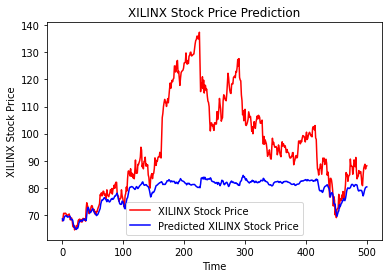

In [12]:
plt.plot(real_stock_price, color = 'red', label = 'XILINX Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted XILINX Stock Price')
plt.title('XILINX Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('XILINX Stock Price')
plt.legend()
plt.show()

In [13]:
explained_variance_score(real_stock_price, predicted_stock_price, multioutput='uniform_average')

0.32376408635848386

In [14]:
max_error(real_stock_price, predicted_stock_price)

57.19374089648437

In [15]:
mean_absolute_error(real_stock_price, predicted_stock_price, multioutput='uniform_average')

15.56570699137662

In [16]:
mean_squared_error(real_stock_price, predicted_stock_price, multioutput='uniform_average', squared=True)

451.6491447295905

In [17]:
mean_squared_error(real_stock_price, predicted_stock_price, multioutput='uniform_average', squared=False)

21.252038601733965

In [18]:
mean_squared_log_error(real_stock_price, predicted_stock_price, multioutput='uniform_average')

0.04581333443836007

In [19]:
median_absolute_error(real_stock_price, predicted_stock_price, multioutput='uniform_average')

10.278785790039066

In [20]:
r2_score(real_stock_price, predicted_stock_price, multioutput='uniform_average')

-0.43637107849474677

In [21]:
mean_poisson_deviance(real_stock_price, predicted_stock_price)

4.859922377872732

In [22]:
mean_gamma_deviance(real_stock_price, predicted_stock_price)

0.052797831767696285